# MALARIA IN AFRICA (2007-2017)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Control display of seaborn data 
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#CAF1DE"})

**DATASET BEFORE CLEANING.**

In [2]:
# Loading the dataset
df = pd.read_csv(r'..\..\resources\datasets\MalariaAfricaDataset.csv')
df

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,NaN,NaN,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,NaN,78.12,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,15.70,NaN,NaN,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,46.25,NaN,NaN,NaN,57.02,2.01,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


**ANALYZING THE DATASET.**

In [3]:
# Checking shape of data (rows, columns)
#getting shape of data (rows, columns
df.shape

(594, 27)

In [4]:
# Checking column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [5]:
# Checking data types
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [6]:
# Checking for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [7]:
# Check null values
df.isnull().sum().sort_values(ascending = False)

People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water services (% of population)                      495
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed sanitation services, rural (% of rural population)             484
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
People using safely managed sanitation services, urban  (% of urban population)            462
People using safely managed sanitation services (% of population)                          462
Use of insecticide-treated bed nets (% of under-5 population)                              462
People using safely managed drinking water services, urban (% of urban population)         418
Malaria cases reported                                                                      44
Incidence of malaria (per 1,000 population at risk

In [8]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [9]:
""" 
I filled both the malaria cases reported and incidence of malaria columns with 0s because the two columns each has 44 nulls , 
since each country appears 11 times, there are 4 countries with nulls throughout the 11 years. Therefore I couldn't calculate the mean.
Also I could not just assume any value to be filled in all the 11 spaces for each country. 
"""
df['Malaria cases reported'].fillna(0, inplace=True)
df['Incidence of malaria (per 1,000 population at risk)'].fillna(0, inplace=True)

**Confirmation that the two columns now have no nulls.**

In [10]:
df['Malaria cases reported'].isnull().sum()

0

In [11]:
df['Incidence of malaria (per 1,000 population at risk)'].isnull().sum()

0

**Handling nulls by filling the missing values with the mean of the rows that have data for each particular country.**

In [12]:
eritrea_means = df.loc[df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
eritrea_data_rows = df.loc[df['Country Name'] == 'Eritrea'].dropna(subset=['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)','Rural population (% of total population)', 'Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(eritrea_means)

In [13]:
sudan_means = df.loc[df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
sudan_data_rows = df.loc[df['Country Name'] == 'South Sudan'].dropna(subset=['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(sudan_means)

In [14]:
car_means = df.loc[df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 
                                                'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
car_data_rows = df.loc[df['Country Name'] == 'Central African Republic'].dropna(subset=['People using at least basic drinking water services (% of population)', 
                                                'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(car_means)

I filled the remaining nulls available with zero because the columns still having nulls have over 75% of the data with nulls.
Calculating mean like the code earlier would give nulls, since for some particular countries, all the 11 times they appear have nulls.

In [15]:
# Replace NaN with zero
df.fillna(0, inplace=True)

**Confirmation that all columns now have no nulls.**

In [16]:
df.isnull().sum().sort_values(ascending = False) 

Country Name                                                                               0
Rural population (% of total population)                                                   0
longitude                                                                                  0
latitude                                                                                   0
People using at least basic sanitation services, urban  (% of urban population)            0
People using at least basic sanitation services, rural (% of rural population)             0
People using at least basic sanitation services (% of population)                          0
People using at least basic drinking water services, urban (% of urban population)         0
People using at least basic drinking water services, rural (% of rural population)         0
People using at least basic drinking water services (% of population)                      0
Urban population growth (annual %)                                    

In [17]:
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

**Changing the data type of the malaria cases reported to int.**

In [18]:
df['Malaria cases reported'] = df['Malaria cases reported'].astype('int')

**Analyze the reported number of malaria cases to understand the burden of malaria in different countries and over time.**

In [19]:
# Filter out Year and Malaria cases reported.
malaria_cases = df[['Year', 'Malaria cases reported']]
malaria_cases

,Year,Malaria cases reported
0,2007,26
1,2007,1533485
2,2007,0
3,2007,390
4,2007,44246
...,...,...
589,2017,1755577
590,2017,0
591,2017,11667831
592,2017,5505639


In [23]:
# Get total malaria cases per year and highlighting a year with maximum total cases.
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: maroon' if cell else '' for cell in is_min]

totalmalaria_cases = malaria_cases.groupby('Year').sum()

totalmalaria_cases.style.apply(highlight_max)

,Malaria cases reported
Year,
2007,10102341
2008,9508374
2009,14414616
2010,22184760
2011,23002865
2012,39719221
2013,47174959
2014,77028814
2015,92968526


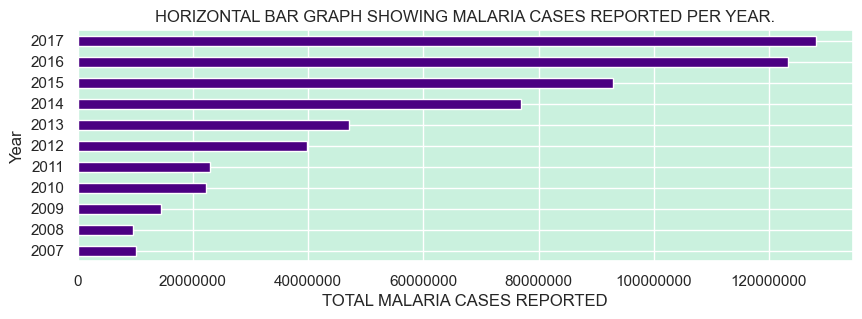

In [26]:
malaria_cases_bar = totalmalaria_cases.plot(kind='barh', align='center', figsize=(10,3), color='indigo', legend =False,
                            title="HORIZONTAL BAR GRAPH SHOWING MALARIA CASES REPORTED PER YEAR.")
# Remove scientific notation from x-axis
plt.ticklabel_format(style='plain', axis='x')

# Set x-axis label
plt.xlabel('TOTAL MALARIA CASES REPORTED')

# Display the plot
plt.show()